
## 6. Topic Modelling 
#### Written by: Isobel Jones
#### Date: 16th of July



1. load in pre processed data
2. Check number of occurances for certain words
3. Prepare a Document-Term matrix
4. Run LDA Model
5. Plot clustermap to show any correlations

In [1]:
import os
import emoji
import pickle
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
from gensim import corpora, models, similarities
import pyLDAvis.gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Get Root working dirctory

In [2]:
rootwd = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
print('Root Working Directory:\n\n', rootwd)

Root Working Directory:

 /Users/isobeljones/DataScience/topic-labelling-system


#### 1. load in pre processed data

In [3]:
def loadData(path):
    #Open the file for reading
    fileObject = open(path,'rb')

    # load the object from the file into var b
    loadedTweets = pickle.load(fileObject)
    return loadedTweets

In [4]:
file_name = rootwd +'/data/GDPRcompliantTweets.dump'

#Open the file for reading
fileObject = open(file_name,'rb')

# load the object from the file into var b
loadedTweets = loadData(file_name)

tweets = [x[:][1] for x in loadedTweets]
print('Number of tweets (documents):',len(tweets))

Number of tweets (documents): 23983


#### 2. Check number of occurances for certain words

In [5]:
def countNumberOfOccurances(token):
    tokenOfInterest = token
    numbferOfOccurances = len([item for i,item in enumerate(tweets) if tokenOfInterest in item])
    print(f'Number of tweets that contain {tokenOfInterest}:',numbferOfOccurances)
    
countNumberOfOccurances("tracking_number")
countNumberOfOccurances("verynetwork")
countNumberOfOccurances("parcel")

Number of tweets that contain tracking_number: 579
Number of tweets that contain verynetwork: 72
Number of tweets that contain parcel: 3387


In [6]:
tweets[3]

['reeally',
 'starting',
 'wish',
 'either',
 'lushltd',
 'reply',
 'tweet',
 '😭',
 '😭']

#### 3. Prepare a Document-Term matrix

In [7]:
# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(tweets)
print(dictionary)

#dictionary.filter_extremes(no_below=2, no_above=0.2) #Remove and tokens which appear less than 10 times
#dictionary.compactify() # Assign new word ids to all words, shrinking any gaps.

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tweets]

Dictionary(20169 unique tokens: ['destiny', 'eta', 'hopefully', 'inconvenience', 'luk']...)


#### 4. Run LDA Model

In [8]:
tfidf = models.TfidfModel(doc_term_matrix) # step 1 -- initialize a model
corpus_tfidf = tfidf[doc_term_matrix]  # step 2 -- use the model to transform vectors
total_topics = 8
lda = models.LdaModel(doc_term_matrix, id2word=dictionary,random_state=1, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold
lda.show_topics(total_topics,8)

[(0,
  '0.043*"parcel" + 0.028*"delivered" + 0.026*"delivery" + 0.019*"ha" + 0.017*"tracking" + 0.014*"card" + 0.014*"number" + 0.013*"arrived"'),
 (1,
  '0.036*"😡" + 0.013*"postoffice" + 0.011*"guaranteed" + 0.009*"come" + 0.007*"waterstones" + 0.007*"monday" + 0.007*"regarding" + 0.007*"tesco"'),
 (2,
  '0.012*"postal" + 0.011*"mail" + 0.010*"door" + 0.010*"vote" + 0.009*"order" + 0.008*"like" + 0.008*"postman" + 0.008*"deliver"'),
 (3,
  '0.021*"stamp" + 0.019*"mikefabricant" + 0.011*"plea" + 0.010*"mile" + 0.009*"lp" + 0.009*"news" + 0.009*"whsmith" + 0.009*"👏"'),
 (4,
  '0.022*"post" + 0.020*"office" + 0.019*"parcel" + 0.016*"delivery" + 0.011*"mail" + 0.011*"thanks" + 0.010*"sorry" + 0.009*"deliver"'),
 (5,
  '0.015*"mail" + 0.013*"post" + 0.011*"delivery" + 0.010*"card" + 0.010*"£" + 0.010*"address" + 0.010*"thank" + 0.010*"service"'),
 (6,
  '0.037*"service" + 0.024*"customer" + 0.014*"june" + 0.013*"complaint" + 0.011*"later" + 0.011*"reply" + 0.010*"tomorrow" + 0.008*"deliver

Each line is a topic with individual topic terms and weights. 

In [9]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(165, 8)
(8, 165)


,absolutely,address,another,answer,anything,arrived,awful,big,block,book,...,working,worse,wrong,year,£,👍,👏,😂,😡,😭
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012733,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.036497,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004894,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004437,0.000000,0.005309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.008797,0.000000,0.000000,0.000000
4,0.005082,0.006026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005402,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.009857,0.000000,0.000000,0.005287,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007048,0.000000,0.010001,0.00548,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.005046,0.000000,0.000000,0.000000,0.004796,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.007024
7,0.000000,0.000000,0.000000,0.005796,0.000000,0.000000,0.000000,0.000000,0.005273,0.000000,...,0.000000,0.006053,0.000000,0.000000,0.000000,0.00000,0.000000,0.031993,0.000000,0.000000


#### 5. Plot clustermap to show any correlations

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/isobeljones/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/isobeljones/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128077 missing from current font.
  font.load_char(ord(s), flags=flags)
/Users/isobeljones/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128079 missing from current font.
  font.load_char(ord(s), flags=flags)


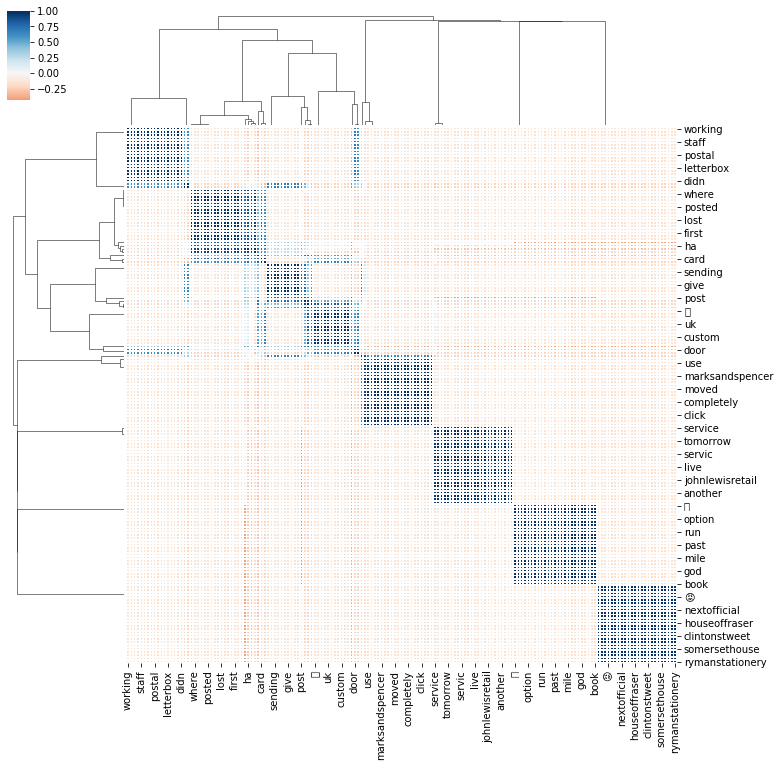

In [10]:
g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

#6. Plot LDA Visualization

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
pyLDAvis.show(panel)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [03/Aug/2019 12:47:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2019 12:47:37] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2019 12:47:37] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2019 12:47:37] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [03/Aug/2019 12:47:37] code 404, message Not Found
127.0.0.1 - - [03/Aug/2019 12:47:37] "GET /apple-touch-icon-precomposed.png HTTP/1.1" 404 -
127.0.0.1 - - [03/Aug/2019 12:47:37] code 404, message Not Found
127.0.0.1 - - [03/Aug/2019 12:47:37] "GET /apple-touch-icon.png HTTP/1.1" 404 -
